In [1]:
import discretize
from discretize import utils
import numpy as np
import scipy.sparse as sp
import sympy
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from scipy.constants import mu_0, inch, foot

from SimPEG.EM import TDEM
from SimPEG import Utils, Maps

import casingSimulations

from pymatsolver import Pardiso

%matplotlib inline

In [2]:
simDir = 'example'

In [31]:
casingModel = casingSimulations.model.CasingInHalfspace(
    directory=simDir,
    sigma_back=1,
    mur_back=1,
    src_a=np.r_[0.,np.pi,0.],
    src_b=np.r_[1e3, np.pi, 0.]
)

In [32]:
casingModel.serialize()

{u'__class__': 'CasingInHalfspace',
 'casing_d': 0.1,
 'casing_l': 1000.0,
 'casing_t': 0.01,
 'casing_top': 0.0,
 'directory': u'example',
 'filename': u'ModelParameters.json',
 'mur_back': 1.0,
 'mur_casing': 100.0,
 'sigma_air': 1e-06,
 'sigma_back': 1.0,
 'sigma_casing': 5500000.0,
 'sigma_inside': 1.0,
 'src_a': [0.0, 3.141592653589793, 0.0],
 'src_b': [1000.0, 3.141592653589793, 0.0],
 'surface_z': 0.0,
 'version': u'0.0.2'}

In [7]:
wholespace.save()

Saved example/ModelParameters.json


In [9]:
cp=casingSimulations.load_properties('/'.join([simDir, 'ModelParameters.json']), targetModule=casingSimulations.model)

In [15]:
npadx, npadz = 9, 18
dx2 = 200. 
csz = 0.5

meshGen2D = casingSimulations.mesh.CasingMeshGenerator(
    cp=casingModel, npadx=npadx, npadz=npadz, domain_x2=dx2, csz=csz
)
mesh2D = meshGen2D.mesh

print(mesh2D.vectorNx.max(), mesh2D.vectorNz.min(), mesh2D.vectorNz.max())

(3108.251953125, -3217.8378200531006, 2217.8378200531006)


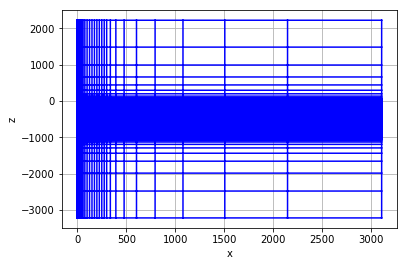

In [16]:
mesh2D.plotGrid()

In [17]:
ncy = 1
nstretchy = 3
stretchfact = 1.6
hy = utils.meshTensor([(1, nstretchy, -stretchfact), (1, ncy), (1, nstretchy, stretchfact)])
hy = hy * 2*np.pi/hy.sum()

In [18]:
meshGen3D = casingSimulations.CasingMeshGenerator(
    cp=casingModel, npadx=npadx, npadz=npadz, domain_x2=dx2, hy=hy, csz=csz
)

/anaconda/lib/python2.7/site-packages/matplotlib/projections/polar.py:65: RuntimeWarning: invalid value encountered in less
  mask = r < 0


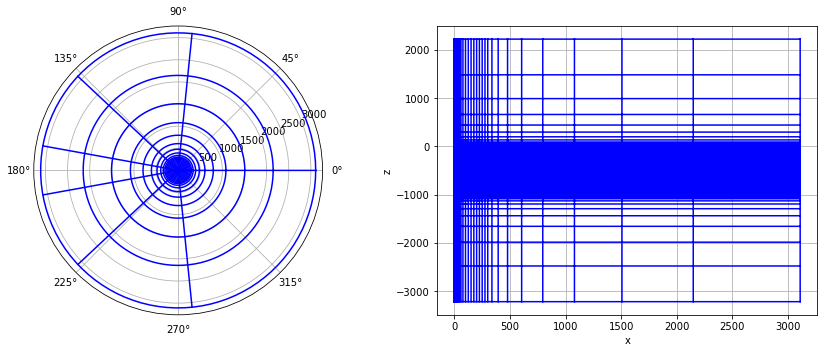

In [19]:
meshGen3D.mesh.plotGrid()

In [21]:
meshGen3D.directory = simDir
meshGen3D.serialize()

{u'__class__': 'CasingMeshGenerator',
 'cp': {u'__class__': 'CasingInHalfspace',
  'casing_d': 0.1,
  'casing_l': 1000.0,
  'casing_t': 0.01,
  'casing_top': 0.0,
  'directory': u'example',
  'filename': u'ModelParameters.json',
  'mur_back': 1.0,
  'mur_casing': 100.0,
  'sigma_air': 1e-06,
  'sigma_back': 1.0,
  'sigma_casing': 5500000.0,
  'sigma_inside': 1.0,
  'src_a': [0.0, 0.0, 0.0],
  'src_b': [1000.0, 3.141592653589793, 0.0],
  'surface_z': 0.0,
  'version': u'0.0.2'},
 'csx1': 0.0025,
 'csx2': 25.0,
 'csz': 0.5,
 'directory': u'example',
 'domain_x2': 200.0,
 'filename': u'MeshParameters.json',
 'hy': [1.4696166638994737,
  0.918510414937171,
  0.5740690093357318,
  0.3587931308348324,
  0.5740690093357318,
  0.918510414937171,
  1.4696166638994737],
 'nca': 5,
 'ncb': 5,
 'npadx': 9,
 'npadz': 18,
 'pfx1': 1.3,
 'pfx2': 1.5,
 'pfz': 1.5,
 'version': u'0.0.2'}

In [22]:
physprops = casingSimulations.model.PhysicalProperties(meshGen3D, casingModel)

(-1500.0, 0.0)

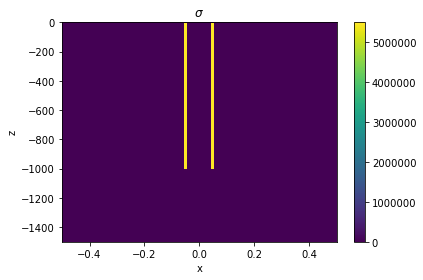

In [25]:
ax = physprops.plot_sigma()
ax.set_xlim([-0.5, 0.5])
ax.set_ylim([-1500., 0.])

In [43]:
casingModel.timeSteps = [(1e-6, 10), (1e-5, 10), (1e-4, 10)]

In [28]:
src = casingSimulations.sources.TopCasingSrc?

In [33]:
src = casingSimulations.sources.TopCasingSrc(
    cp=casingModel, directory=simDir, meshGenerator=meshGen3D
)

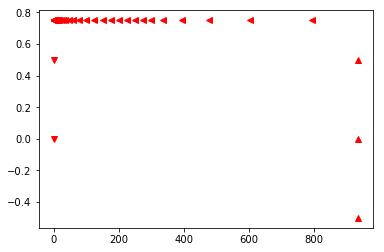

In [34]:
src.plot()

In [44]:
sim = casingSimulations.run.SimulationTDEM(cp=casingModel, meshGenerator=meshGen3D, directory=simDir, src=src)

In [38]:
sim.survey.prob

In [45]:
sim.validate()

True

In [46]:
sim.write_py()

Saved example/ModelParameters.json
Saved example/MeshParameters.json
Saved example/Source.json
wrote example/simulation.py
